In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from modules import operations
import warnings
warnings.filterwarnings('ignore')
import os
%matplotlib inline

In [2]:
data = pd.read_csv('Data/TSLA.csv') #from yahoo website

In [3]:
data['Date']= pd.to_datetime(data['Date'])

In [4]:
data['Close'].describe()

count    1259.000000
mean      145.537898
std       113.468284
min        11.931333
25%        22.608666
50%       147.559998
75%       236.318329
max       409.970001
Name: Close, dtype: float64

Text(0.5, 1.0, 'Close Price over Time')

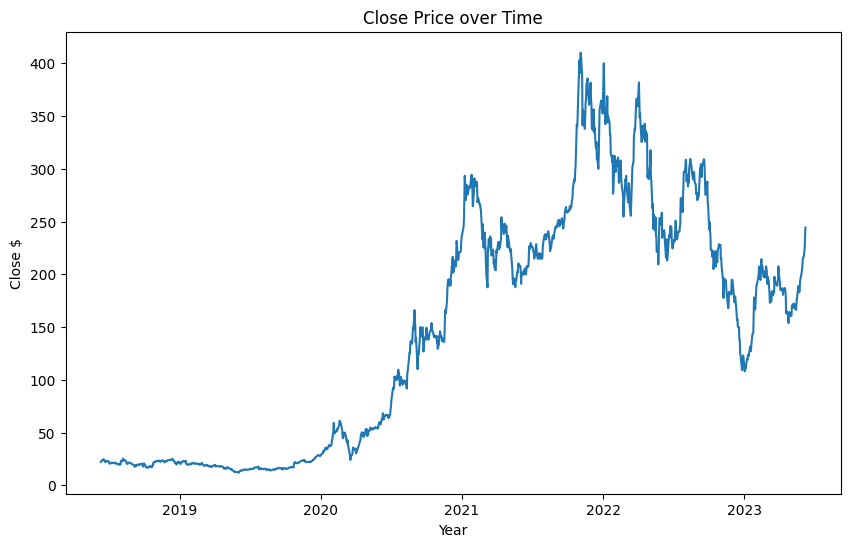

In [5]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'],data['Close'])
plt.xlabel('Year') 
plt.ylabel('Close $') 
  
# displaying the title
plt.title("Close Price over Time")

In [6]:
data['Rolling'] = data['Close'].rolling(100).mean()

In [7]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Rolling
0,2018-06-11,21.500668,22.310667,21.500000,22.139999,22.139999,197752500,NaN
1,2018-06-12,22.980000,23.664667,22.533333,22.851334,22.851334,335211000,NaN
2,2018-06-13,23.114000,23.146667,22.653334,22.985332,22.985332,142047000,NaN
3,2018-06-14,23.175333,23.916668,23.106667,23.848000,23.848000,164715000,NaN
4,2018-06-15,23.589333,24.311333,23.416668,23.878000,23.878000,162724500,NaN
...,...,...,...,...,...,...,...,...
1254,2023-06-05,217.800003,221.289993,214.520004,217.610001,217.610001,151143100,180.0074
1255,2023-06-06,216.139999,221.910004,212.529999,221.309998,221.309998,146911600,180.9883
1256,2023-06-07,228.000000,230.830002,223.199997,224.570007,224.570007,185710800,181.9984
1257,2023-06-08,224.220001,235.229996,223.009995,234.860001,234.860001,164489700,183.1230


Text(0.5, 1.0, 'Close Price + Rolling 100 Day over Time')

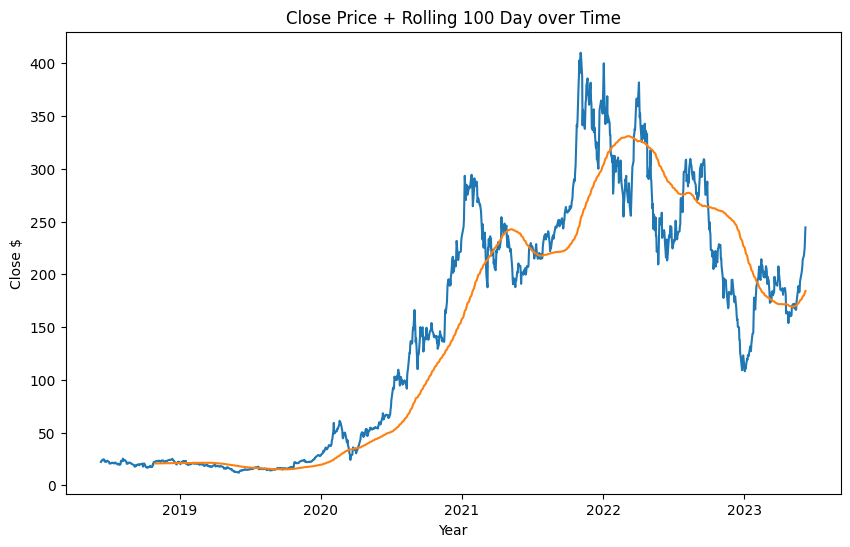

In [8]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'],data['Close'])
plt.plot(data['Date'],data['Rolling'])
plt.xlabel('Year') 
plt.ylabel('Close $') 
  
# displaying the title
plt.title("Close Price + Rolling 100 Day over Time")

In [9]:
data['Year'] = data['Date'].dt.strftime('%Y')
data_year = data.groupby(['Year'])['Close'].mean()
data_year = data_year.reset_index()

Text(0.5, 1.0, 'Avg Close Price over Time')

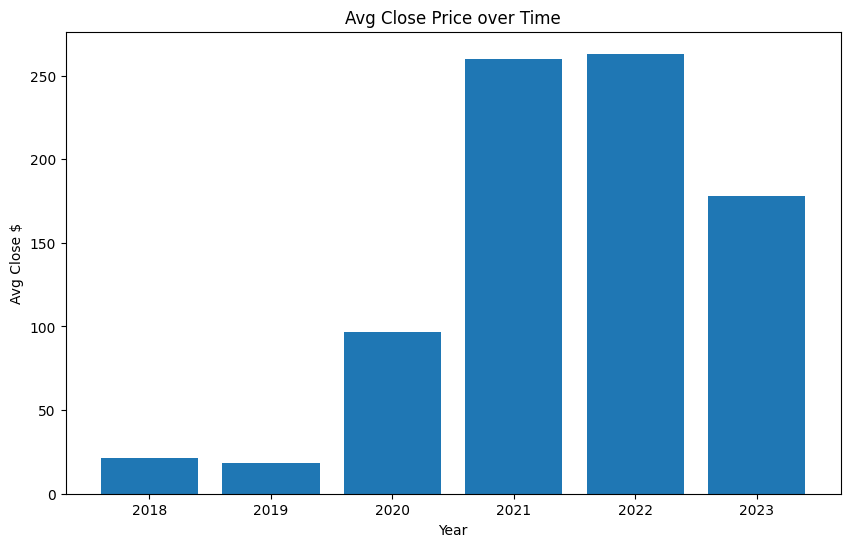

In [10]:
plt.figure(figsize=(10,6))
plt.bar(data_year['Year'],data_year['Close'])
plt.xlabel('Year') 
plt.ylabel('Avg Close $') 
  
# displaying the title
plt.title("Avg Close Price over Time")

In [11]:
data['Return'] = np.nan


# Initialize an empty list to store percentage changes
percentage_changes = []

# Iterate through the list starting from the second element
for i in range(0, len(data['Close'])):
    if i == 0:
        percentage_changes.append(np.nan)
    else:
        current_element = data['Close'][i]
        previous_element = data['Close'][i - 1]
        
        # Calculate percentage change and append to the new list
        percentage_change = operations.returns(current_element,previous_element)
        percentage_changes.append(percentage_change)

data['Return'] = percentage_changes

# could use data['Close'].pct_change()


In [12]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Rolling,Year,Return
0,2018-06-11,21.500668,22.310667,21.500000,22.139999,22.139999,197752500,NaN,2018,NaN
1,2018-06-12,22.980000,23.664667,22.533333,22.851334,22.851334,335211000,NaN,2018,0.032129
2,2018-06-13,23.114000,23.146667,22.653334,22.985332,22.985332,142047000,NaN,2018,0.005864
3,2018-06-14,23.175333,23.916668,23.106667,23.848000,23.848000,164715000,NaN,2018,0.037531
4,2018-06-15,23.589333,24.311333,23.416668,23.878000,23.878000,162724500,NaN,2018,0.001258
...,...,...,...,...,...,...,...,...,...,...
1254,2023-06-05,217.800003,221.289993,214.520004,217.610001,217.610001,151143100,180.0074,2023,0.017012
1255,2023-06-06,216.139999,221.910004,212.529999,221.309998,221.309998,146911600,180.9883,2023,0.017003
1256,2023-06-07,228.000000,230.830002,223.199997,224.570007,224.570007,185710800,181.9984,2023,0.014731
1257,2023-06-08,224.220001,235.229996,223.009995,234.860001,234.860001,164489700,183.1230,2023,0.045821


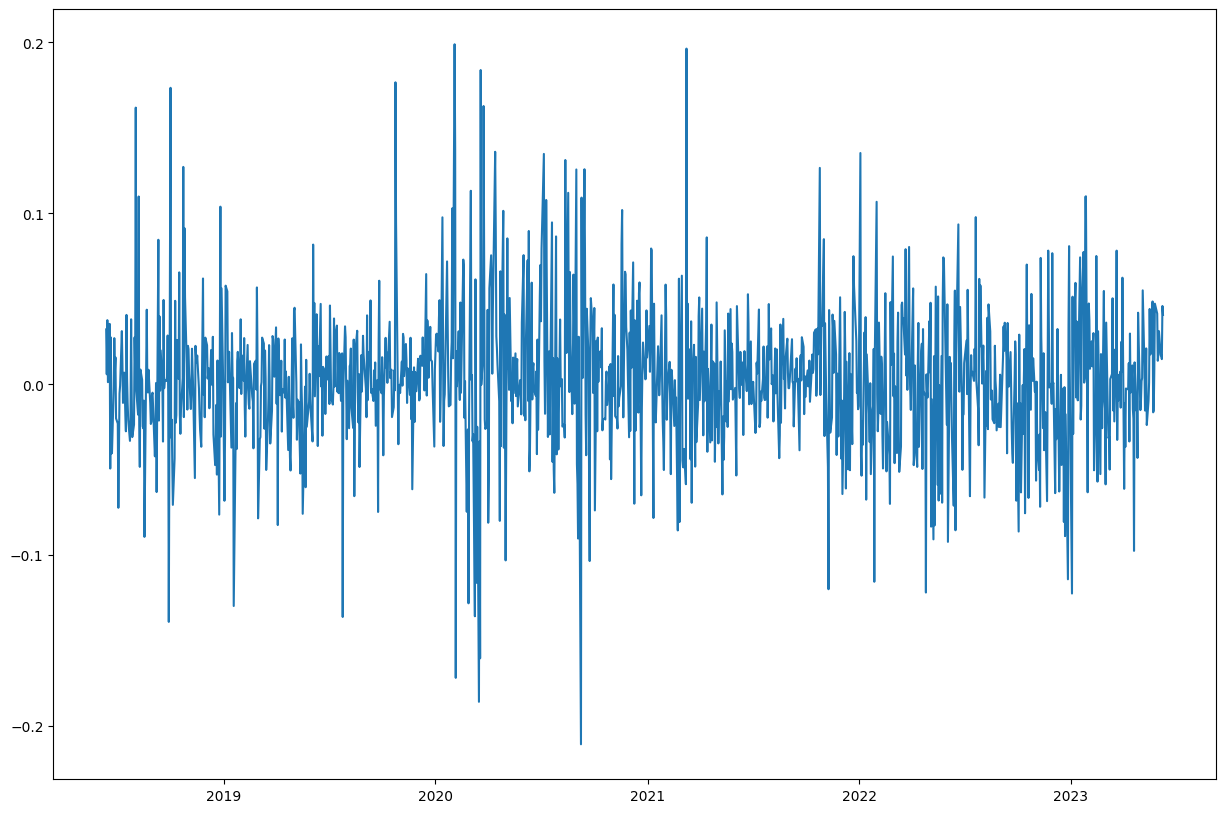

In [13]:
# Plotly Graph, might not show in Github
plt.figure(figsize=(15,10))
plt.plot(data['Date'], data['Return'])


In [18]:
mean_return = data['Return'].mean()
std_return = data['Return'].std()
risk_free_rate =0.02

print('Mean: {m}, Std: {s}'.format(m =mean_return,s = std_return))

Mean: 0.0027849649790950754, Std: 0.041878622081388116


In [15]:
sharpe_ratio = operations.sharpe_ratio(mean_return,std_return,risk_free_rate)

In [16]:
sharpe_ratio

-0.4110697574396963